In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain
from PattRecClasses.func import compute_pX, BaumWelch, HMM_prediction, load_data, plot_fft, plot_prediction_HMM

In [2]:
path_list = ['data/standing/', 'data/walking/', 'data/running/']
data_list = []
true_label_list = []
prefix = np.load('data/prefix.npy')

for i, path in enumerate(path_list):
    for root, dirs, files in os.walk(path):
        for file in files:
            single_csv = os.path.join(root, file)
            data = np.concatenate((prefix, load_data(single_csv, averaging=True, window=2)), axis=1)
            label = i + 1
            data_list.append(data)
            true_label_list.append(label)

In [3]:
with open('hmm_05_11.pkl', 'rb') as param:
    hmm = pickle.load(param)
q = hmm.stateGen.q
A = hmm.stateGen.A
distribution = hmm.outputDistr

In [4]:
pred_label_list = []

for data in data_list:
    _, pred_class = HMM_prediction(q, A, distribution, data, decision=True)
    pred_label_list.append(pred_class)

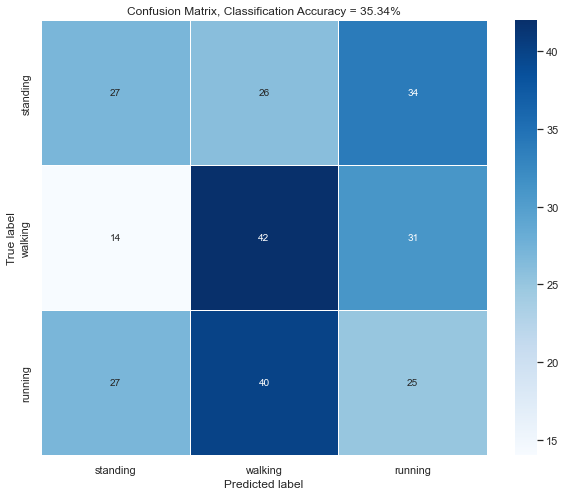

In [5]:
replacement_dict = {
    1: "standing",
    2: "walking",
    3: "running"
}
true_labels = [replacement_dict.get(x, x) for x in true_label_list]
pred_labels = [replacement_dict.get(x, x) for x in pred_label_list]

labels = ["standing", "walking", "running"]

cm = confusion_matrix(true_labels, pred_labels, labels=labels)
acc = accuracy_score(true_labels, pred_labels)

sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix, Classification Accuracy = {:.2f}%'.format(acc * 100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
from collections import Counter

Counter(true_labels)

Counter({'standing': 87, 'walking': 87, 'running': 92})

In [14]:
Counter(pred_labels)

Counter({'standing': 68, 'walking': 108, 'running': 90})